#Redes Neuronales - Trabajo Práctico Número 1 - Ejercicio 1
#Autor: Franco Scapolla

# Notebook 3: Fashion-MNIST con MLP


La idea ahora es resolver el problema de clasificación de Fashion-MNIST usando modelos con redes neuronales.

# Requerimientos del clasificador

* Métrica principal: Accuracy (se busca un Accuracy mayor a $0.83$)
* Métricas secundarias: curva ROC, área bajo curva ROC, F1-Score, Precision, Recall.



# 3.1 Importe de librerías

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from keras.models import Sequential, Model, clone_model
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from keras.callbacks import Callback, TensorBoard, ModelCheckpoint, EarlyStopping, LearningRateScheduler
from keras.initializers import RandomNormal, Zeros, glorot_normal, glorot_uniform
from keras.utils import to_categorical
from keras import regularizers
import datetime

#3.2 Carga y preprocesamiento de datos

In [2]:
x_train = np.load("/content/drive/MyDrive/Redes Neuronales/TP1/train_images.npy")
x_train.shape

(60000, 28, 28)

In [3]:
y_train = pd.read_csv("/content/drive/MyDrive/Redes Neuronales/TP1/train_labels.csv")
y_train.describe()

,label
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [4]:
#Normalizo las intensidades a valores entre 0 y 1
x_train_scaled = x_train / 255.0
#Paso los labels a un arreglo de numpy
y_train_np = y_train['label'].to_numpy()
#Tomo 48000 imágenes para train y 12000 para validación
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train_scaled, y_train_np, test_size=0.2, random_state=42, shuffle=True)
#Creo una lista con las distintas clases por comodidad
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
#Paso los labels a formato one-hot encoded
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

# 3.3 Modelo de referencia

La idea de esta notebook es ensayar cómo varía el accuracy al modificar distintos hiperparámetros. Se parte del siguiente modelo de referencia:


* Una capa flatten de entrada, para la imagen
* Una capa densa de 256 neuronas con activación ReLu
* Una capa densea de 128 neuronas con activación ReLu
* Una capa de salida de 10 neuronas con activación softmax
* Batch_size = 32
* Epochs = 50
* Optimizador = Adam
* Learning rate = 0.01
* Dropout rate = 0.2
* Early Stopping con patience = 10

Con este modelo se obtiene un accuracy en validación de alrededor del 90%, que cumple con los requerimientos del problema. Además, para este modelo se calculan las distintas métricas secundarias. La idea entonces es que al ensayar cómo varía el accuracy al variar los hiperparámetros, se tome a este modelo como una referencia para la comparación.

In [ ]:
# Loading TensorBoard for learning logging
%load_ext tensorboard

In [ ]:
# Define model checkpoint callback
checkpoint_path = "/content/drive/MyDrive/Redes Neuronales/TP1/mlp_ej1_model1.hdf5"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

In [ ]:
#Construyo el modelo
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [ ]:
#Defino las métricas
metrics = ["accuracy"]
#Defino el optimizador
optimizer = Adam(learning_rate=0.001)
#Compilo el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
#Defino callback para Early Stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1, restore_best_weights=True)

In [ ]:
#Entreno el modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping, checkpoint])

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5604 - accuracy: 0.7986 - val_loss: 0.4141 - val_accuracy: 0.8430
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4192 - accuracy: 0.8453 - val_loss: 0.3733 - val_accuracy: 0.8627
Epoch 3/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3833 - accuracy: 0.8594 - val_loss: 0.3663 - val_accuracy: 0.8671
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3571 - accuracy: 0.8683 - val_loss: 0.3385 - val_accuracy: 0.8743
Epoch 5/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3410 - accuracy: 0.8734 - val_loss: 0.3338 - val_accuracy: 0.8770
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3247 - accuracy: 0.8782 - val_loss: 0.3351 - val_accuracy: 0.8783
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3187 - accuracy: 0.8797 - val_loss: 0.3524 - val_accurac

In [ ]:
#Evalúo los resultados
results_train = model.evaluate(x_train, y_train)
print("Training Loss: {:.4f}".format(results_train[0]))
print("Training Accuracy: {:.4f}".format(results_train[1]))
results_val = model.evaluate(x_val, y_val)
print("Validation Loss: {:.4f}".format(results_val[0]))
print("Validation Accuracy: {:.4f}".format(results_val[1]))

1500/1500 [==============================] - 5s 3ms/step - loss: 0.2029 - accuracy: 0.9232
Training Loss: 0.2029
Training Accuracy: 0.9232
375/375 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.8923
Validation Loss: 0.3100
Validation Accuracy: 0.8923


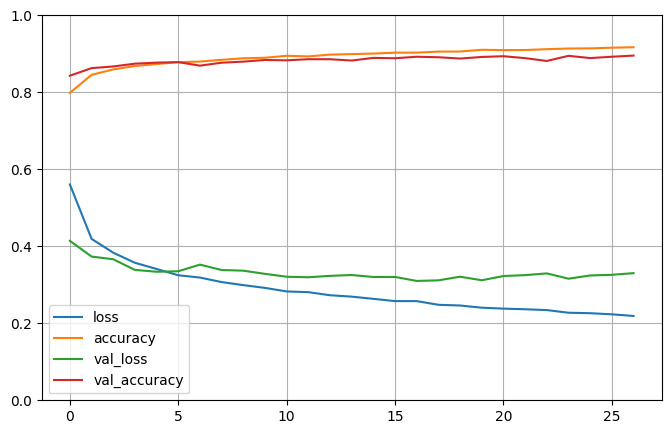

In [ ]:
#Grafico los resultados
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 3.3.1 Métricas secundarias

Ahora me interesa estudiar las métricas secundarias, para lo cual primero grafico la matriz de confusión usando scikit-learn. A partir de eso puedo obtener valores de precision y recall para cada clase, y luego valores promedio usando para este caso *macro-averaging*, ya que todas las clases tienen la misma cantidad de elementos. De forma similar puedo calcular el F1 Score para cada clase y el promedio. Luego de eso, grafico la curva ROC y calculo el área debajo de dicha curva para cada clase. Luego obtengo el valor promedio nuevamente usando *macro-averaging*

In [ ]:
#Genero predicciones usando el dataset de validación
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

375/375 [==============================] - 2s 4ms/step


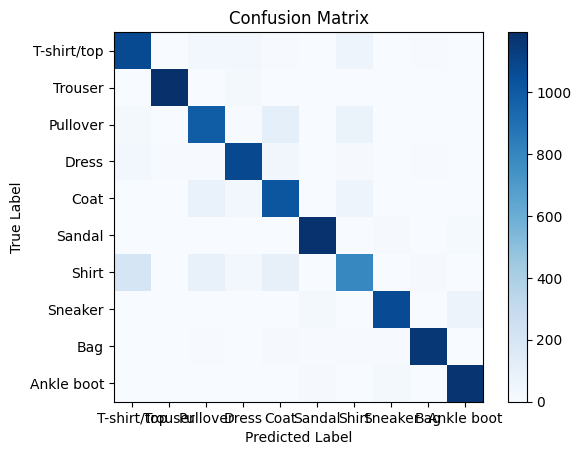

In [ ]:
#Grafico la matriz de confusión
cm = metrics.confusion_matrix(y_val, y_pred_classes)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = class_names
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Se observa que la mayor confusión parece darse entre *shirt* y *t-shirt*, lo cual tiene sentido ya que esas prendas son las más similares. Además, se nota un grado de confusión apreciable entre otras prendas de vestir "similares". Por ejemplo, entre *shirt*, *dress* y *pullover*.

In [ ]:
#Ahora calculo los valores de precision, recall, y F1Score para cada clase. Luego calculo el macro-average
report = metrics.classification_report(y_val, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1202
           1       0.99      0.98      0.98      1219
           2       0.82      0.82      0.82      1205
           3       0.90      0.91      0.90      1184
           4       0.79      0.85      0.82      1202
           5       0.96      0.97      0.97      1211
           6       0.79      0.65      0.71      1218
           7       0.96      0.92      0.94      1159
           8       0.97      0.97      0.97      1197
           9       0.93      0.97      0.95      1203

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



Se observa que el menor valor de precision, recall, y F1 Score es para la clase 6, o sea para la clase *shirt*. Esto se condice con lo observado en la matriz de confusión, en donde se observó una superposición notable entre la clase *shirt* y las otras clases representando prendas de vestir similares.

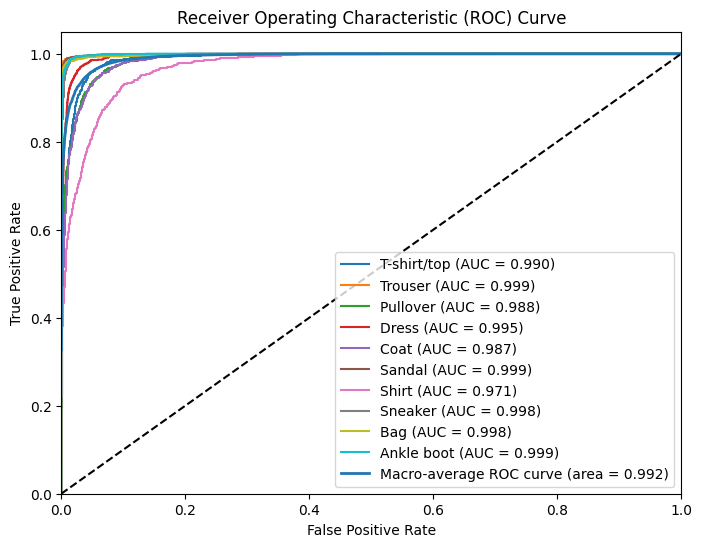

In [ ]:
#Ahora grafico la curva ROC para cada clase, y calculo el área debajo de cada curva (referencia: https://stackoverflow.com/questions/70278059/plotting-the-roc-curve-for-a-multiclass-problem)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_val == i, y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(10)]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(10):
    tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= 10
roc_auc_macro = metrics.auc(fpr_macro, tpr_macro)

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.3f})')
plt.plot(fpr_macro, tpr_macro, label=f'Macro-average ROC curve (area = {roc_auc_macro:0.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


El menor área lo tiene la clase *shirt*, lo cual era lo esperado luego de observar la matriz de confusión y los valores de precision y recall.

# 3.4 Variación del accuracy al variar distintos hiperparámetros

# 3.4.1 Variación del accuracy al variar el learning rate


Ahora comenzamos el análisis de cómo se modifica el accuracy al variar los distintos hiperparámetros. Para este primer caso, analizamos el learning rate del optimizador, que como indica el modelo de referencia, es Adam, ya que con éste se obtuvieron los mejores resultados.

En un principio dejamos presente early stopping pero aumentamos la tolerancia a 20. Además, dejamos la cantidad de epochs fija en 50. Lo que se espera observar es que con learning rates más chicos la conergencia sea más lenta, y que con la cantidad de epochs usada y con early stopping presente, es muy posible que valores muy chicos de learning rate ocasionen que el modelo no converja. De forma similar, si los valores de learning rate son muy grandes es posible que el modelo diverja.

In [ ]:
#Pruebo con tres learning rates: 0.001, 0.01, y 0.1
learning_rates = [0.001, 0.01, 0.1]
accuracies = []

In [ ]:
#Entreno los modelos
for lr in learning_rates:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=lr)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    early_stopping = EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])
    accuracies.append(history.history['val_accuracy'])

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5581 - accuracy: 0.7996 - val_loss: 0.4110 - val_accuracy: 0.8473
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4192 - accuracy: 0.8484 - val_loss: 0.3995 - val_accuracy: 0.8553
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3830 - accuracy: 0.8597 - val_loss: 0.3721 - val_accuracy: 0.8608
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3598 - accuracy: 0.8685 - val_loss: 0.3394 - val_accuracy: 0.8777
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3403 - accuracy: 0.8742 - val_loss: 0.3302 - val_accuracy: 0.8771
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3263 - accuracy: 0.8794 - val_loss: 0.3360 - val_accuracy: 0.8788
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3174 - accuracy: 0.8836 - val_loss: 0.3342 - val_accura

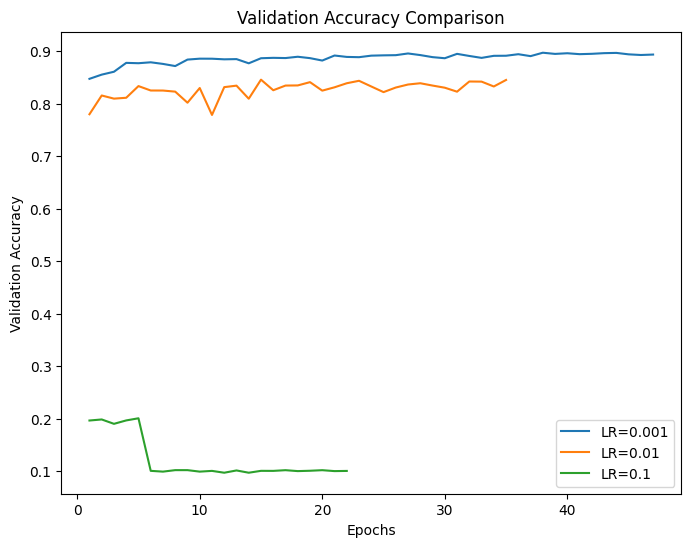

In [ ]:
#Grafico los resultados
plt.figure(figsize=(8, 6))
for i, lr in enumerate(learning_rates):
    epochs = range(1, len(accuracies[i]) + 1)
    plt.plot(epochs, accuracies[i], label=f'LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

Se observa que tanto con un learning rate de 0.001 como con uno de 0.01 se obtienen resultados de accuracy de validación superiores al 80%.


Con un valor de 0.1, sin embargo, se observa que el modelo diverge. El modelo efectivamente no puede aprender ya que en cada salto se excede de la solución óptima y se aleja cada vez más. Sería interesante observar cómo afectar variar el learning rate en distintos optimizadores. ADAM tiene por defecto un learning rate de 0.001, y en este caso se observa que ese valor es el que da los mejores resultados.

# 3.4.2 Variación del accuracy al variar el batch size


Ahora se repite el experimento pero dejando el learning rate fijo en 0.001, y se estudia cómo varía el accuracy al variar el batch size en el entrenamiento. Para ello se parte del modelo de referencia.


Usar un batch size más grande tiene la principal ventaja de dar un cálculo de gradiente más preciso, al usar una mayor cantidad de muestras. Esto, por supuesto, tiene como desventaja que el tiempo del entrenamiento es mayor. Qué tanto mayor dependará también del optimizador utilizado, pero normalmente a mayor batch size mayor será el tiempo de entrenamiento. Además, un tamaño de batch size mayor puede tener un efecto regularizador, al tomar más muestras, lo que reduce la probabilidad de tener overfitting.

In [ ]:
#Pruebo con los siguientes batch sizes: 32, 128, 256, y 512
batch_sizes = [32, 128, 256, 512]
accuracies = []

In [ ]:
for batch_size in batch_sizes:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    early_stopping = EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=50, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping])
    accuracies.append(history.history['val_accuracy'])

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5503 - accuracy: 0.8014 - val_loss: 0.4192 - val_accuracy: 0.8431
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4127 - accuracy: 0.8496 - val_loss: 0.3875 - val_accuracy: 0.8595
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3745 - accuracy: 0.8622 - val_loss: 0.3574 - val_accuracy: 0.8702
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3534 - accuracy: 0.8692 - val_loss: 0.3433 - val_accuracy: 0.8753
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3365 - accuracy: 0.8758 - val_loss: 0.3319 - val_accuracy: 0.8771
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3293 - accuracy: 0.8790 - val_loss: 0.3324 - val_accuracy: 0.8793
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3140 - accuracy: 0.8832 - val_loss: 0.3246 - val_acc

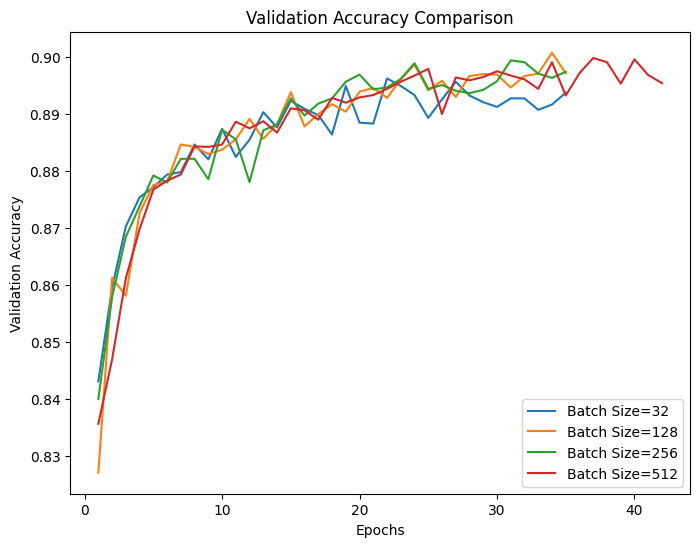

In [ ]:
#Grafico los resultados
plt.figure(figsize=(8, 6))
for i, batch_size in enumerate(batch_sizes):
    epochs = range(1, len(accuracies[i]) + 1)
    plt.plot(epochs, accuracies[i], label=f'Batch Size={batch_size}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

Las variaciones son menores mientras mayor es el batch size, lo cual era lo esperado por lo mencionado antes de que el gradiente es más preciso mientras mayor es el batch size al estar tomando más muestras. El mayor valor de accuracy parece ser alcanzado por un batch size de 128, y es cercano al 90%.  Fuera de eso los resultados son bastante similares, de donde se concluye que con este modelo el efecto del tamaño del batch size no es tan significativo (por lo menos en el rango de valores analizado).

# 3.4.3 Variación del accuracy al variar el optimizador


Ahora se estudia cómo varía el accuracy al variar el optimizador. Se parte del modelo de referencia, que usa ADAM, y se lo vuelve a entrenar probando otros optimizadores: Stochastic Gradient Descent (SGD), Adagrad, Adadelta, y RMSProp. En cada caso se usa el learning rate que keras brinda por defecto. 

In [ ]:
#Pruebo con cinco optimizadores distintos: ADAM, SGD, Adagrad, Adadelta, y RMSProp
optimizers = [Adam(), SGD(), Adagrad(), Adadelta(), RMSprop()]
optimizer_names = ['Adam', 'SGD', 'Adagrad', 'Adadelta', 'RMSProp']
accuracies = []

In [ ]:
for optimizer in optimizers:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    metrics = ["accuracy"]
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    early_stopping = EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=50, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping])
    accuracies.append(history.history['val_accuracy'])

Epoch 1/50
94/94 [==============================] - 3s 31ms/step - loss: 0.7813 - accuracy: 0.7254 - val_loss: 0.4797 - val_accuracy: 0.8335
Epoch 2/50
94/94 [==============================] - 3s 30ms/step - loss: 0.4730 - accuracy: 0.8331 - val_loss: 0.4050 - val_accuracy: 0.8568
Epoch 3/50
94/94 [==============================] - 2s 22ms/step - loss: 0.4147 - accuracy: 0.8510 - val_loss: 0.3899 - val_accuracy: 0.8588
Epoch 4/50
94/94 [==============================] - 3s 31ms/step - loss: 0.3816 - accuracy: 0.8626 - val_loss: 0.3562 - val_accuracy: 0.8710
Epoch 5/50
94/94 [==============================] - 3s 29ms/step - loss: 0.3578 - accuracy: 0.8716 - val_loss: 0.3391 - val_accuracy: 0.8788
Epoch 6/50
94/94 [==============================] - 2s 21ms/step - loss: 0.3386 - accuracy: 0.8771 - val_loss: 0.3313 - val_accuracy: 0.8795
Epoch 7/50
94/94 [==============================] - 2s 21ms/step - loss: 0.3293 - accuracy: 0.8809 - val_loss: 0.3280 - val_accuracy: 0.8802
Epoch 8/50
94

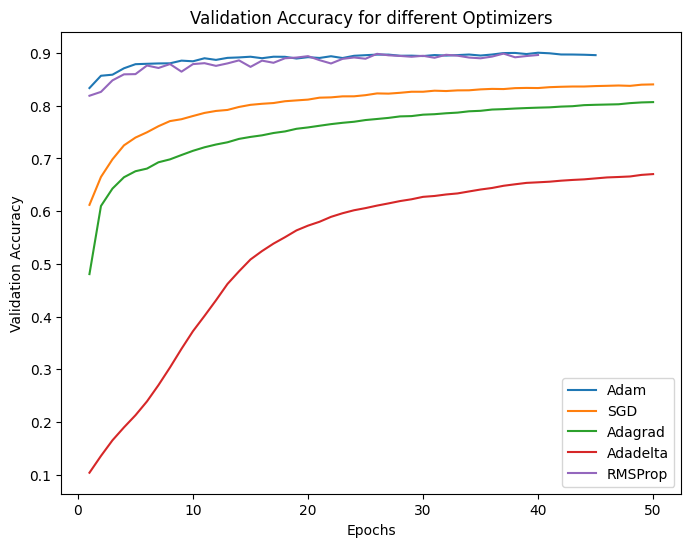

In [ ]:
plt.figure(figsize=(8, 6))
for i, optimizer_name in enumerate(optimizer_names):
    epochs = range(1, len(accuracies[i]) + 1)
    plt.plot(epochs, accuracies[i], label=optimizer_name)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for different Optimizers')
plt.legend()
plt.show()

Se observa que efectivamente ADAM es el optimizador que da el accuracy más alto, seguido de RMSProp, que da resultados muy parecidos. En tercer lugar está SGD, que logra un accuracy superior al 80% pero menor a los dos primeros. Adagrad no está muy alejado de SGD pero no llega al 80%, mientras que Adadelta es el que da los peores resultados.



# 3.4.4 Variación del accuracy al variar la función de activación


Ahora se estudia cómo varía el accuracy al variar la función de activación de las capas densas. Se parte del modelo de referencia, que usa una activación ReLu (Rectified Linear Unit), y luego se prueba las siguientes funciones: Sigmoidea, Leaky ReLu, Tanh (tangente hiperbólica). Se mantiene a ADAM con un learning rate de 0.001 como optimizador y un batch size de 32.


In [ ]:
# Pruebo cuatro funciones de activación: ReLu, Sigmoidea, Leaky ReLu, y Tanh
activation_functions = ['relu', 'sigmoid', 'leaky_relu', 'tanh']
activation_names = ['ReLU', 'Sigmoid', 'Leaky ReLU', 'Tanh']
accuracies = []

In [ ]:
#Entreno los modelos con las diferentes funciones de activación
for activation_function in activation_functions:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation=activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation=activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    early_stopping = EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])
    accuracies.append(history.history['val_accuracy'])

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5628 - accuracy: 0.7984 - val_loss: 0.4086 - val_accuracy: 0.8512
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4169 - accuracy: 0.8456 - val_loss: 0.3921 - val_accuracy: 0.8594
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3810 - accuracy: 0.8594 - val_loss: 0.3679 - val_accuracy: 0.8682
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3572 - accuracy: 0.8684 - val_loss: 0.3523 - val_accuracy: 0.8704
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3414 - accuracy: 0.8725 - val_loss: 0.3489 - val_accuracy: 0.8737
Epoch 6/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3296 - accuracy: 0.8781 - val_loss: 0.3252 - val_accuracy: 0.8841
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3189 - accuracy: 0.8825 - val_loss: 0.3343 - val_accuracy:

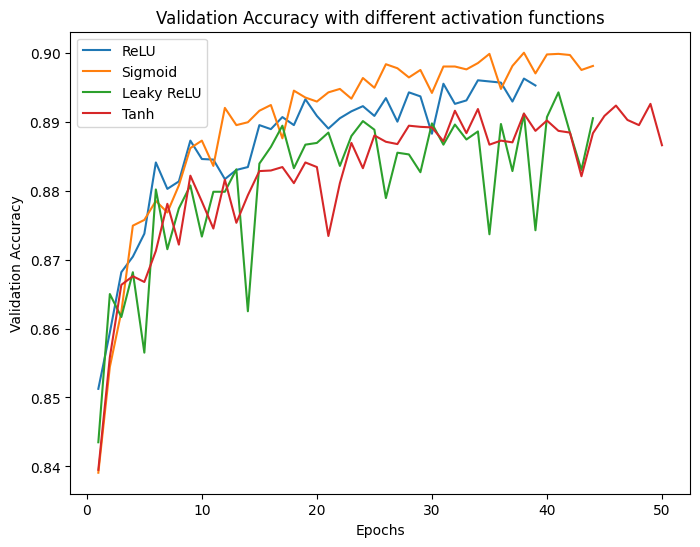

In [ ]:
#Grafico los resultados
plt.figure(figsize=(8, 6))
for i, activation_name in enumerate(activation_names):
    epochs = range(1, len(accuracies[i]) + 1)
    plt.plot(epochs, accuracies[i], label=activation_name)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy with different activation functions')
plt.legend()
plt.show()

Se observa que los mejores resultados se obtienen con una función de activación sigmoidea, si bien la diferencia entre estos y los que se obtienen con ReLu no es significativa. De hecho las diferencias no son particularmente significativas para ninguna función de activación. Se concluye que de forma similar a lo que pasaba con el batch size, la elección de la función de activación (por lo menos entre las estudiadas) no afecta significativamente al modelo.

# 3.4.5 Variación del accuracy al variar el dropout rate


Ahora se busca estudiar cómo se ve afectado el accuracy al variar el dropout rate de las capas de dropout. Dropout es una técnica de regularización, que consiste en fijar en forma aleatoria una fracción de los nodos de la capa en cero (ya sea la de entrada o una capa oculta). De esta forma se busca disminuir la posibilidad de que ocurra overfitting. El dropout rate de una capa de droput se refiere a la fracción de los nodos que se fijan en cero. Valores típicos de dropout rate están entre 0.2 y 0.5. Mientras mayor sea el valor de dropout rate, más general será el modelo (menor probabilidad de overfitting) pero menor será su capacidad de aprender patrones complejos.


El modelo de referencia ya cuenta con dos capas de dropout con un dropout rate de 0.2. Se estudia qué sucede con los siguientes valores: 0.3, 0.5, 0.7 y 0.9. Se mantiene a ADAM como optimizador con un learning rate de 0.001, y además se mantiene un batch size de 32 y se usa early stopping.

In [ ]:
#Pruebo con los siguientes valores de dropout rate: 0.2, 0.3, 0.5, 0.7, 0.9
dropout_rates = [0.2, 0.3, 0.5, 0.7, 0.9]
dropout_values = ["0.2", "0.3", "0.5", "0.7", "0.9"]
accuracies = []

In [ ]:
#Entreno los distintos modelos
for dropout_rate in dropout_rates:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    early_stopping = EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])
    accuracies.append(history.history['val_accuracy'])

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5533 - accuracy: 0.8020 - val_loss: 0.4331 - val_accuracy: 0.8407
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4120 - accuracy: 0.8511 - val_loss: 0.3762 - val_accuracy: 0.8636
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3815 - accuracy: 0.8594 - val_loss: 0.3731 - val_accuracy: 0.8624
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3584 - accuracy: 0.8670 - val_loss: 0.3401 - val_accuracy: 0.8771
Epoch 5/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3405 - accuracy: 0.8744 - val_loss: 0.3283 - val_accuracy: 0.8786
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3235 - accuracy: 0.8784 - val_loss: 0.3394 - val_accuracy: 0.8781
Epoch 7/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3189 - accuracy: 0.8817 - val_loss: 0.3430 - val_accura

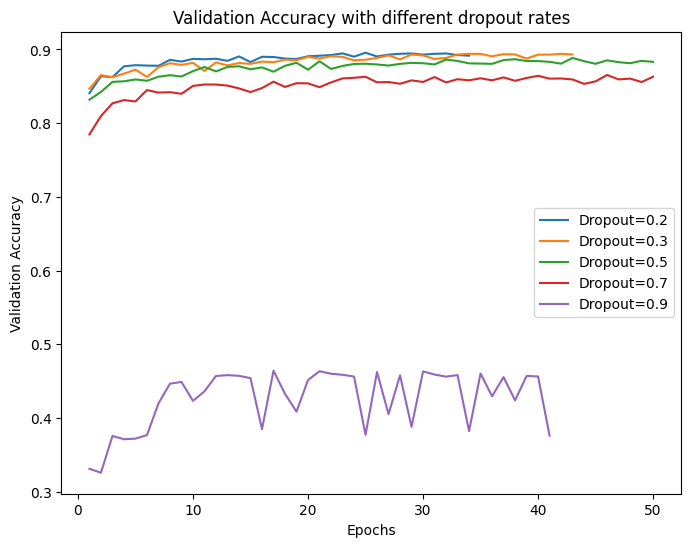

In [ ]:
#Grafico los resultados
plt.figure(figsize=(8, 6))
for i, dropout_value in enumerate(dropout_values):
    epochs = range(1, len(accuracies[i]) + 1)
    plt.plot(epochs, accuracies[i], label=f'Dropout={dropout_value}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy with different dropout rates')
plt.legend()
plt.show()

Se observa que los mejores resultados se obtienen con los valores de dropout rate más pequeños analizados: 0.2 y 0.3. Los valores de 0.5 y 0.7, si bien dan resultados ligeramente inferiores, tampoco representan una pérdida notable de accuracy.


Con un valor de dropout rate de 0.9 el modelo no logra ser lo suficientemente complejo para aprender a clasificar este dataset, de donde el accuracy se mantiene siempre debajo del 50%.

# 3.4.6 Variación del accuracy al introducir Batch Normalization


Batch Normalization reduce el "Internal Covariance Shift" (https://arxiv.org/pdf/1502.03167.pdf) lo que permite acelerar el entrenamiento. Además, tiene un efecto de regilarización.

El modelo de referencia no cuenta con Batch Normalization. Sin embargo, existe un confilicto entre Dropout y Batch Normalization (https://arxiv.org/abs/1801.05134) por lo que los mejores resultados se obtienen usando o uno o el otro. Lo que se propone, entonces, es entrenar un modelo con Dropout, uno con Batch Normalization, y otro con los dos, y compar el accuracy para los tres casos.

In [ ]:
#Defino las distintas configuraciones
model_configurations = [
    {"dropout": True, "batch_normalization": False, "name": "Dropout"},
    {"dropout": True, "batch_normalization": True, "name": "Dropout + Batch_Normalization"},
    {"dropout": False, "batch_normalization": True, "name": "Batch_Normalization"}
]
accuracies = []

In [ ]:
#Entreno los distintos modelos
for configuration in model_configurations:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu"))
    if configuration["dropout"]:
        model.add(Dropout(0.2))    
    if configuration["batch_normalization"]:
        model.add(BatchNormalization()) 
    model.add(Dense(128, activation="relu"))
    if configuration["dropout"]:
        model.add(Dropout(0.2))    
    if configuration["batch_normalization"]:
        model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    early_stopping = EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])
    accuracies.append(history.history['val_accuracy'])

Epoch 1/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5542 - accuracy: 0.8003 - val_loss: 0.4020 - val_accuracy: 0.8531
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4156 - accuracy: 0.8472 - val_loss: 0.3761 - val_accuracy: 0.8642
Epoch 3/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3823 - accuracy: 0.8592 - val_loss: 0.3664 - val_accuracy: 0.8651
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3605 - accuracy: 0.8662 - val_loss: 0.3381 - val_accuracy: 0.8782
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3449 - accuracy: 0.8739 - val_loss: 0.3448 - val_accuracy: 0.8747
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3298 - accuracy: 0.8785 - val_loss: 0.3250 - val_accuracy: 0.8827
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3159 - accuracy: 0.8833 - val_loss: 0.3252 - val_accuracy:

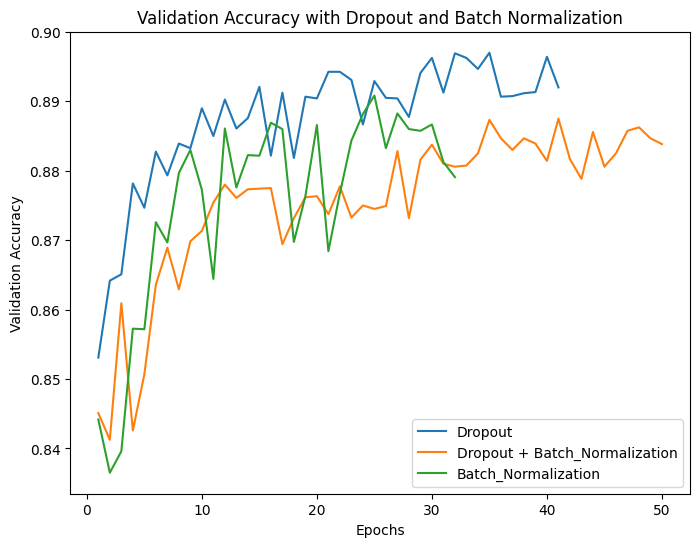

In [ ]:
#Grafico los resultados
plt.figure(figsize=(8, 6))
for i, configuration in enumerate(model_configurations):
    epochs = range(1, len(accuracies[i]) + 1)
    plt.plot(epochs, accuracies[i], label=configuration["name"])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy with Dropout and Batch Normalization')
plt.legend()
plt.show()

Los mejores resultados se obtienen usando solamente Dropout. Se ve que efectivamente combinar Dropout y Btach Normalization genera los peores resultados, si bien la diferencia es muy poco significativa.

# 3.4.7 Variación del Accuracy al introducir inicializadores de peso


Ahora se introducen distintos inicializadores de peso y se observa cómo eso afecta el resultado de la red. Se estudian las siguiente técnicas: Zero Initialization, Glorot Normal, Glorot Uniforme, Normal(0,1), Normal(0, 0.1), y Normal(0,0.01).

In [ ]:
#Defino las distintas maneras de inicialización de pesos
initializations = [
    {"initializer": "zeros", "name": "Zeros"},
    {"initializer": "glorot_normal", "name": "Glorot Normal"},
    {"initializer": "glorot_uniform", "name": "Glorot Uniforme"},
    {"initializer": RandomNormal(mean=0.0, stddev=1.0), "name": "Normal(0, 1)"},
    {"initializer": RandomNormal(mean=0.0, stddev=0.1), "name": "Normal(0, 0.1)"},
    {"initializer": RandomNormal(mean=0.0, stddev=0.01), "name": "Normal(0, 0.01)"}
]
accuracies = []

In [ ]:
#Entreno los modelos
for initialization in initializations:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu", kernel_initializer=initialization["initializer"]))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu", kernel_initializer=initialization["initializer"]))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax", kernel_initializer=initialization["initializer"]))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    early_stopping = EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])
    accuracies.append(history.history["val_accuracy"])

Epoch 1/50
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 2/50
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3027 - val_accuracy: 0.0987
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1004
Epoch 5/50
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1016
Epoch 6/50
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1004
Epoch 7/50
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0961 - val_loss: 2.3027 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 158.1644 - accuracy: 0.5663 - val_loss: 13.2670 - val_accuracy: 0.6815
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 20.6500 - accuracy: 0.5408 - val_loss: 2.4327 - val_accuracy: 0.4922
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 5.1622 - accuracy: 0.4050 - val_loss: 1.6206 - val_accuracy: 0.3837
Epoch 4/50
1500/1500 [==============================] - 8s 6ms/step - loss: 2.6725 - accuracy: 0.3445 - val_loss: 1.5261 - val_accuracy: 0.3543
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 2.0522 - accuracy: 0.3377 - val_loss: 1.4852 - val_accuracy: 0.3742
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 1.8021 - accuracy: 0.3642 - val_loss: 1.4388 - val_accuracy: 0.3761
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6962 - accuracy: 0.3695 - val_loss: 1.3372 - val_accu

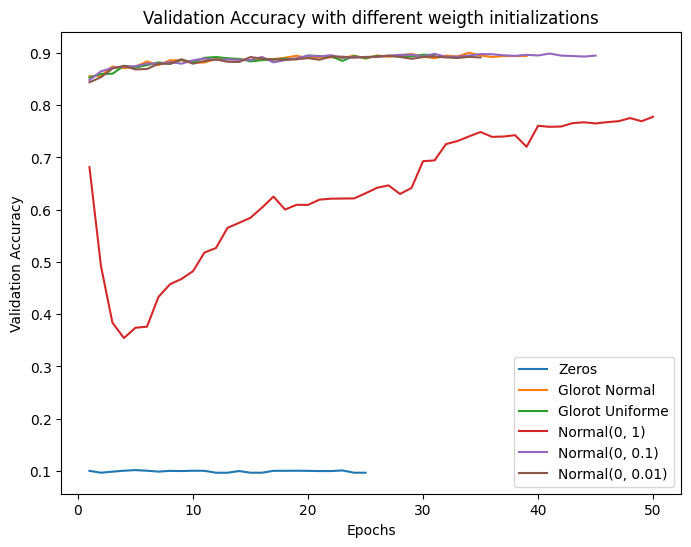

In [ ]:
#Grafico los resultados
plt.figure(figsize=(8, 6))
for i, initialization in enumerate(initializations):
    epochs = range(1, len(accuracies[i]) + 1)
    plt.plot(epochs, accuracies[i], label=initialization["name"])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy with different weigth initializations')
plt.legend()
plt.show()

Se observa que ambos Glorot y las distribuciones Normales con desvío estándar 0.1 y 0.001 dan resultados muy similares y muy buenos, alrededor de 90%. Se observa que al usar un desvío estándar de 1 para la distribución normal, los resultados obtenidos son aceptables aunque menores que para los casos anteriores. Esto se debe a que en general mientas menor sea el desvío estándar, más cerca estarán los pesos a cero, lo que permite que la convergencia se alcance más suavemente, mientras que mientras mayor sean los pesos iniciales más impacto tendrán y mayor será la posibilidad de que el modelo diverja o varíe notablemente. Inicializar en cero da resultados muy inferiores (un accuracy por debajo del 10%). Efectivamente al inicializar todos los pesos con el mismo valor, se le está dando una simetría a la red tal que cada neurona de cada capa computa lo mismo, impidiéndole a la red adaptarse a patrones complejos.

# 3.5 Variación en la cantidad de iteraciones al variar distintos hiperparámetros


La idea ahora es ver cómo afectan los distintos hiperparámetros a la cantidad de iteraciones o epochs. Lo que se propone es lo siguiente: para cada modelo, contar la cantidad de iteraciones necesarias hasta llegar a un cierto valor de accuracy de validación. Para que esta parte no demore demasiado, se toma un límite superior de 100 iteraciones; es decir, si algún modelo no llega al accuracy pedido en menos de 100 iteraciones, se corta el entrenamiento y se marca esto.


Como early stopping no me perimite detener el entrenamiento una vez alcanzado cierto valor de accuracy, utilizo el siguiente callback que sí me permite hacer eso, tomado de https://stackoverflow.com/questions/53500047/stop-training-in-keras-when-accuracy-is-already-1-0

In [5]:
class TerminateOnBaseline(Callback):
    """Callback that terminates training when either acc or val_acc reaches a specified baseline
    """
    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

# 3.5.1 Variación en la cantidad e iteraciones al variar el learning rate


Partiendo del modelo de referencia, se entrenan tres modelos utilizando ADAM como optimizador. Un modelo con un learning rate de 0.1, otro con uno de 0.01, y otro con uno de 0.001. Se mide la cantidad de iteraciones necesarias para llegar a un accuracy de 89% en cada caso.

In [ ]:
#Pruebo con tres learning rates: 0.1, 0.01, 0.001
learning_rates = [0.1, 0.01, 0.001]
accuracies = []
number_of_epochs = []

In [ ]:
#Entreno los modelos
for lr in learning_rates:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=lr)
    callback = [TerminateOnBaseline(monitor='val_accuracy', baseline=0.89)]
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), callbacks=callback)
    accuracies.append(history.history["val_accuracy"])
    number_of_epochs.append(len(history.history["val_accuracy"]))

Epoch 1/100
1500/1500 [==============================] - 12s 7ms/step - loss: 2.7222 - accuracy: 0.2003 - val_loss: 1.8088 - val_accuracy: 0.2173
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 2.1850 - accuracy: 0.1457 - val_loss: 2.3238 - val_accuracy: 0.1009
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 2.3164 - accuracy: 0.1020 - val_loss: 2.3047 - val_accuracy: 0.1009
Epoch 4/100
1500/1500 [==============================] - 12s 8ms/step - loss: 2.3163 - accuracy: 0.0991 - val_loss: 2.3162 - val_accuracy: 0.0987
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 2.3150 - accuracy: 0.1009 - val_loss: 2.3062 - val_accuracy: 0.1016
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3155 - accuracy: 0.1003 - val_loss: 2.3243 - val_accuracy: 0.1004
Epoch 7/100
1500/1500 [==============================] - 11s 7ms/step - loss: 2.3158 - accuracy: 0.0986 - val_loss: 2.3120 - v

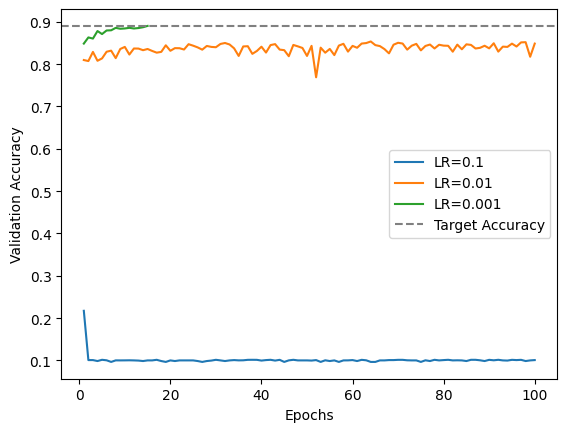

Modelo con learning rate=0.1 no alcanzó un accuracy de 89% en menos de 100 epochs.
Modelo con learning rate=0.01 no alcanzó un accuracy de 89% en menos de 100 epochs.
Modelo con learning rate=0.001 alcanzó un accuracy de 89% en 15 epochs.


In [ ]:
#Grafico los resultados
for i, lr in enumerate(learning_rates):
    plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], label=f'LR={lr}')

plt.axhline(y=0.89, color='gray', linestyle='--', label='Target Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


for i, lr in enumerate(learning_rates):
    if number_of_epochs[i] < 100:
        print(f"Modelo con learning rate={lr} alcanzó un accuracy de 89% en {number_of_epochs[i]} epochs.")
    else:
        print(f"Modelo con learning rate={lr} no alcanzó un accuracy de 89% en menos de 100 epochs.")

Se observa que únicamente con un learning rate de 0.001 se alcanza el accuracy de 89% en menos de 100 epochs. El modelo con 0.01, sin mebargo, da resultados aceptables, aunque no tan buencos como el de 0.001. El modelo con 0.1 diverge debido al alto valor de learning rate.

#3.5.2 Variación en la cantidad de iteraciones al variar el batch size


Calculo para cada batch size cuántas iteraciones se precisan para llegar a un accuracy de 89%.

In [ ]:
#Pruebo con los siguientes batch sizes: 32, 128, 256, 512
batch_sizes = [32, 128, 256, 512]
accuracies = []
number_of_epochs = []

In [ ]:
for batch_size in batch_sizes:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    callback = [TerminateOnBaseline(monitor='val_accuracy', baseline=0.89)]
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    history = model.fit(x_train, y_train, epochs=100, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=callback)
    accuracies.append(history.history["val_accuracy"])
    number_of_epochs.append(len(history.history["val_accuracy"]))

Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5666 - accuracy: 0.7963 - val_loss: 0.4079 - val_accuracy: 0.8487
Epoch 2/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4203 - accuracy: 0.8462 - val_loss: 0.3671 - val_accuracy: 0.8620
Epoch 3/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3833 - accuracy: 0.8604 - val_loss: 0.3664 - val_accuracy: 0.8639
Epoch 4/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3639 - accuracy: 0.8681 - val_loss: 0.3421 - val_accuracy: 0.8786
Epoch 5/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3447 - accuracy: 0.8733 - val_loss: 0.3373 - val_accuracy: 0.8758
Epoch 6/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3301 - accuracy: 0.8780 - val_loss: 0.3324 - val_accuracy: 0.8773
Epoch 7/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3187 - accuracy: 0.8831 - val_loss: 0.3374 -

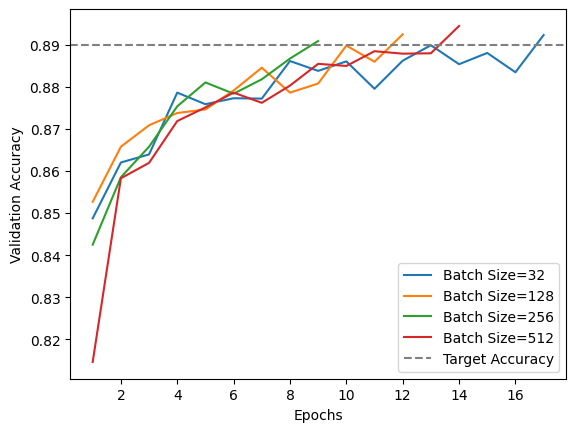

Modelo con batch_size=32 alcanzó un accuracy de 89% en 17 epochs.
Modelo con batch_size=128 alcanzó un accuracy de 89% en 12 epochs.
Modelo con batch_size=256 alcanzó un accuracy de 89% en 9 epochs.
Modelo con batch_size=512 alcanzó un accuracy de 89% en 14 epochs.


In [ ]:
#Grafico los resultados
for i, batch_size in enumerate(batch_sizes):
    plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], label=f"Batch Size={batch_size}")

plt.axhline(y=0.89, color="gray", linestyle="--", label="Target Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


for i, batch_size in enumerate(batch_sizes):
    if number_of_epochs[i] < 100:
        print(f"Modelo con batch_size={batch_size} alcanzó un accuracy de 89% en {number_of_epochs[i]} epochs.")
    else:
        print(f"Modelo con batch_size={batch_size} no alcanzó un accuracy de 89% en menos de 100 epochs")

Se observa que en los cuatro casos se logra llegar al accuracy buscado. El que más rápido lo hace es el modelo con un batch size de 256. No obstante, la diferencia en cantidad de iteraciones no es muy grande. Esto se condice con la conlusión obtendia en la primera parte, en donde se vio que el tamaño del batch size (en el rango considerado) no afecta significativamente al desempeño de este modelo.

# 3.5.3 Variación en la cantidad de iteraciones al variar el optimizador


Mido la cantidad de iteraciones hasta llegar a un accuracy de 85% para cada optimizador, y tomo un límite de 100 epochs.

In [ ]:
#Pruebo con cinco optimizadores distintos: ADAM, SGD, Adagrad, Adadelta, y RMSProp
optimizers = [Adam(), SGD(), Adagrad(), Adadelta(), RMSprop()]
optimizer_names = ['Adam', 'SGD', 'Adagrad', 'Adadelta', 'RMSProp']
accuracies = []
number_of_epochs = []

In [ ]:
for optimizer in optimizers:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    metrics = ["accuracy"]
    callback = [TerminateOnBaseline(monitor='val_accuracy', baseline=0.85)]
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), callbacks=callback)
    accuracies.append(history.history["val_accuracy"])
    number_of_epochs.append(len(history.history["val_accuracy"]))

Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5589 - accuracy: 0.7995 - val_loss: 0.4141 - val_accuracy: 0.8557
Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.8657 - accuracy: 0.7021 - val_loss: 0.5686 - val_accuracy: 0.8066
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5797 - accuracy: 0.7999 - val_loss: 0.4876 - val_accuracy: 0.8320
Epoch 3/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5121 - accuracy: 0.8230 - val_loss: 0.4502 - val_accuracy: 0.8403
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4720 - accuracy: 0.8351 - val_loss: 0.4235 - val_accuracy: 0.8492
Epoch 5/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4490 - accuracy: 0.8422 - val_loss: 0.4081 - val_accuracy: 0.8543
Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 1.2479 - accuracy: 0.5909 - val_loss: 0.8137 - val

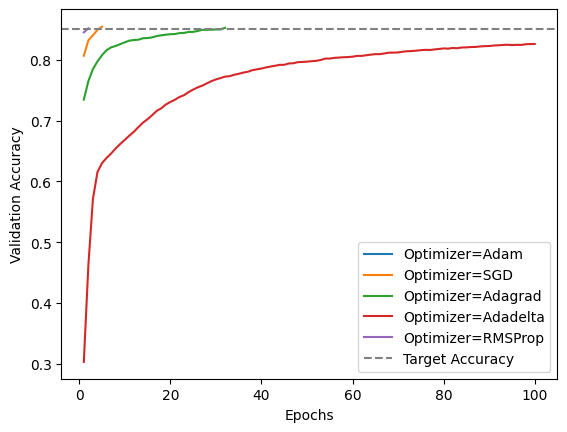

Modelo con optimizador Adam alcanzó un accuracy de 85% en 1 epochs.
Modelo con optimizador SGD alcanzó un accuracy de 85% en 5 epochs.
Modelo con optimizador Adagrad alcanzó un accuracy de 85% en 32 epochs.
Modelo con optimizador Adadelta no alcanzó un accuracy de 85% en menos de 100 epochs
Modelo con optimizador RMSProp alcanzó un accuracy de 85% en 2 epochs.


In [ ]:
#Grafico los reultados
for i, lr in enumerate(optimizers):
    plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], label=f"Optimizer={optimizer_names[i]}")

plt.axhline(y=0.85, color="gray", linestyle="--", label="Target Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


for i, batch_size in enumerate(optimizers):
    if number_of_epochs[i] < 100:
        print(f"Modelo con optimizador {optimizer_names[i]} alcanzó un accuracy de 85% en {number_of_epochs[i]} epochs.")
    else:
        print(f"Modelo con optimizador {optimizer_names[i]} no alcanzó un accuracy de 85% en menos de 100 epochs")

Se observa que ADAM es el optimizador que permite obtener el menor número de iteraciones, segudio de RMSProp y SGD. Adagrad llega al target accuracy en 32 epochs, mientras que Adadelta no lo hace en menos de 100 epochs. Estos resultados se condicen con lo observado antes. El optimizador que da los mejores resultados en cuanto a accuracy es también el que demora la menor cantidad de iteraciones.

# 3.5.4 Variación en la cantidad de iteraciones al variar la función de activación


Mido la cantidad de iteraciones hasta llegar a un target accuracy de 85% para las distintas funciones de activación.

In [ ]:
# Pruebo cuatro funciones de activación: ReLu, Sigmoidea, Leaky ReLu, y Tanh
activation_functions = ['relu', 'sigmoid', 'leaky_relu', 'tanh']
activation_names = ['ReLU', 'Sigmoid', 'Leaky ReLU', 'Tanh']
accuracies = []
number_of_epochs = []

In [ ]:
#Entreno los modelos con las diferentes funciones de activación
for activation_function in activation_functions:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation=activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation=activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    callback = [TerminateOnBaseline(monitor='val_accuracy', baseline=0.89)]
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=callback)
    accuracies.append(history.history["val_accuracy"])
    number_of_epochs.append(len(history.history["val_accuracy"]))

Epoch 1/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5571 - accuracy: 0.8012 - val_loss: 0.4354 - val_accuracy: 0.8364
Epoch 2/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4165 - accuracy: 0.8493 - val_loss: 0.3711 - val_accuracy: 0.8603
Epoch 3/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3787 - accuracy: 0.8617 - val_loss: 0.3491 - val_accuracy: 0.8712
Epoch 4/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3579 - accuracy: 0.8688 - val_loss: 0.3370 - val_accuracy: 0.8775
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3431 - accuracy: 0.8737 - val_loss: 0.3276 - val_accuracy: 0.8794
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3299 - accuracy: 0.8793 - val_loss: 0.3543 - val_accuracy: 0.8622
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3160 - accuracy: 0.8825 - val_loss: 0.3410 - val_accur

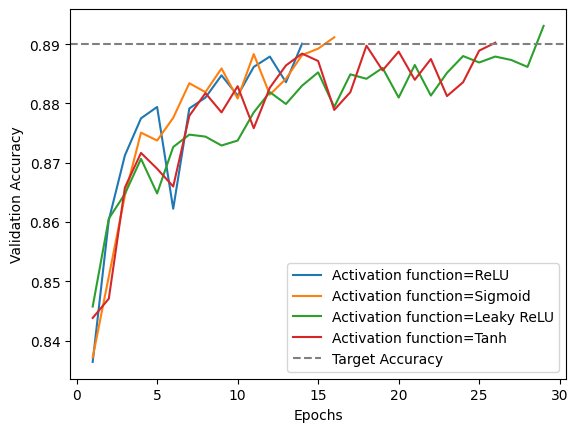

Modelo con función de activación ReLU alcanzó un accuracy de 89% en 14 epochs.
Modelo con función de activación Sigmoid alcanzó un accuracy de 89% en 16 epochs.
Modelo con función de activación Leaky ReLU alcanzó un accuracy de 89% en 29 epochs.
Modelo con función de activación Tanh alcanzó un accuracy de 89% en 26 epochs.


In [ ]:
#Grafico los resultados
for i, lr in enumerate(activation_functions):
    plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], label=f"Activation function={activation_names[i]}")

plt.axhline(y=0.89, color="gray", linestyle="--", label="Target Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


for i, batch_size in enumerate(activation_functions):
    if number_of_epochs[i] < 50:
        print(f"Modelo con función de activación {activation_names[i]} alcanzó un accuracy de 89% en {number_of_epochs[i]} epochs.")
    else:
        print(f"Modelo con función de activación {activation_names[i]} no alcanzó un accuracy de 89% en menos de 50 epochs")

Todas las funciones de actiavación alncanzan el target accuracy en menos de 30 epochs. La diferencia en la cantidad de iteraciones no es tan significativa. Así como ReLu y sigmoidea eran las activaciones que daban los mejores accuracies (si bien la diferencia no era tan significativa), estas activaciones son también las que dan el menor número de iteraciones. 

# 3.5.5 Variación de la cantidad de iteraciones al variar el dropout rate

In [6]:
#Pruebo con los siguientes valores de dropout rate: 0.2, 0.3, 0.5, 0.7, 0.9
dropout_rates = [0.2, 0.3, 0.5, 0.7, 0.9]
dropout_values = ["0.2", "0.3", "0.5", "0.7", "0.9"]
accuracies = []
number_of_epochs = []

In [7]:
#Entreno los distintos modelos
for dropout_rate in dropout_rates:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation="softmax"))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    callback = [TerminateOnBaseline(monitor='val_accuracy', baseline=0.89)]
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), callbacks=callback)
    accuracies.append(history.history["val_accuracy"])
    number_of_epochs.append(len(history.history["val_accuracy"]))

Epoch 1/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5539 - accuracy: 0.8003 - val_loss: 0.4222 - val_accuracy: 0.8473
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4161 - accuracy: 0.8496 - val_loss: 0.4010 - val_accuracy: 0.8554
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3780 - accuracy: 0.8628 - val_loss: 0.3581 - val_accuracy: 0.8743
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3567 - accuracy: 0.8672 - val_loss: 0.3381 - val_accuracy: 0.8734
Epoch 5/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3367 - accuracy: 0.8767 - val_loss: 0.3373 - val_accuracy: 0.8767
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3259 - accuracy: 0.8796 - val_loss: 0.3472 - val_accuracy: 0.8745
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3147 - accuracy: 0.8824 - val_loss: 0.3205 - val

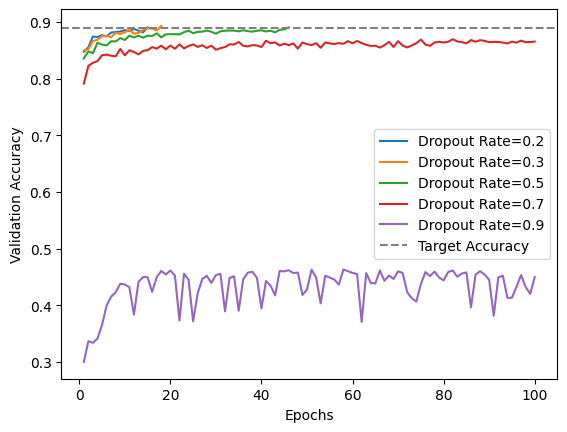

Modelo con dropout rate=0.2 alcanzó un accuracy de 89% en 15 epochs.
Modelo con dropout rate=0.3 alcanzó un accuracy de 89% en 18 epochs.
Modelo con dropout rate=0.5 alcanzó un accuracy de 89% en 46 epochs.
Modelo con dropout rate=0.7 no alcanzó un accuracy de 89% en menos de 100 epochs
Modelo con dropout rate=0.9 no alcanzó un accuracy de 89% en menos de 100 epochs


In [8]:
#Grafico los resultados
for i, dropout_value in enumerate(dropout_values):
    plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], label=f"Dropout Rate={dropout_value}")

plt.axhline(y=0.89, color="gray", linestyle="--", label="Target Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


for i, dropout_value in enumerate(dropout_values):
    if number_of_epochs[i] < 100:
        print(f"Modelo con dropout rate={dropout_value} alcanzó un accuracy de 89% en {number_of_epochs[i]} epochs.")
    else:
        print(f"Modelo con dropout rate={dropout_value} no alcanzó un accuracy de 89% en menos de 100 epochs")

Se observa que a menor dropout rate, menor cantidad de iteraciones, lo cual tiene sentido ya que se están eliminando menos neuronas. En particular, si el dropout rate es 0.5 o menor el modelo alcanza el target accuracy en menos de 100 iteraciones. Con un dropout rate de 0.7 se obtiene un valor de accuracy aceptable pero no se alcanza el targe accuracy en menos de 100 iteraciones. Con un dropout rate de 0.9 el modelo no logra aprender patrones complejos, por lo que el accuracy se mantiene muy por debajo del target accuracy.

# 3.5.6 Variación de la cantidad de iteraciones al incorporar Batch Normalization

In [ ]:
#Defino las distintas configuraciones
model_configurations = [
    {"dropout": True, "batch_normalization": False, "name": "Dropout"},
    {"dropout": True, "batch_normalization": True, "name": "Dropout + Batch_Normalization"},
    {"dropout": False, "batch_normalization": True, "name": "Batch_Normalization"}
]
accuracies = []
number_of_epochs = []

In [ ]:
#Entreno los distintos modelos
for configuration in model_configurations:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu"))
    if configuration["dropout"]:
        model.add(Dropout(0.2))    
    if configuration["batch_normalization"]:
        model.add(BatchNormalization()) 
    model.add(Dense(128, activation="relu"))
    if configuration["dropout"]:
        model.add(Dropout(0.2))    
    if configuration["batch_normalization"]:
        model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    callback = [TerminateOnBaseline(monitor='val_accuracy', baseline=0.89)]
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), callbacks=callback)
    accuracies.append(history.history["val_accuracy"])
    number_of_epochs.append(len(history.history["val_accuracy"]))

Epoch 1/100
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5613 - accuracy: 0.7987 - val_loss: 0.4094 - val_accuracy: 0.8522
Epoch 2/100
1500/1500 [==============================] - 11s 8ms/step - loss: 0.4155 - accuracy: 0.8488 - val_loss: 0.3745 - val_accuracy: 0.8622
Epoch 3/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3806 - accuracy: 0.8621 - val_loss: 0.3623 - val_accuracy: 0.8676
Epoch 4/100
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3602 - accuracy: 0.8683 - val_loss: 0.3678 - val_accuracy: 0.8681
Epoch 5/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3417 - accuracy: 0.8748 - val_loss: 0.3419 - val_accuracy: 0.8765
Epoch 6/100
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3282 - accuracy: 0.8779 - val_loss: 0.3194 - val_accuracy: 0.8845
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3162 - accuracy: 0.8812 - val_loss: 0.3202 - 

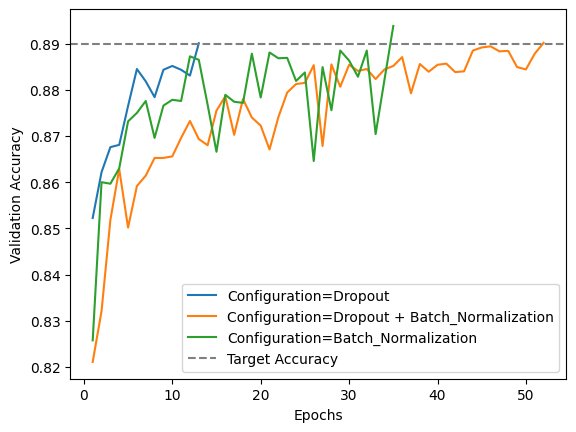

Modelo con Dropout alcanzó un accuracy de 89% en 13 epochs.
Modelo con Dropout + Batch_Normalization alcanzó un accuracy de 89% en 52 epochs.
Modelo con Batch_Normalization alcanzó un accuracy de 89% en 35 epochs.


In [ ]:
#Grafico los resultados
for i, configuration in enumerate(model_configurations):
    plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], label=f"Configuration={configuration['name']}")

plt.axhline(y=0.89, color="gray", linestyle="--", label="Target Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


for i, configuration in enumerate(model_configurations):
    if number_of_epochs[i] < 100:
        print(f"Modelo con {configuration['name']} alcanzó un accuracy de 89% en {number_of_epochs[i]} epochs.")
    else:
        print(f"Modelo con {configuration['name']} no alcanzó un accuracy de 89% en menos de 100 epochs")

Se observa que así como el modelo que usaba únicamente dropout era el que daba el mejor accuracy, también es este modelo el que da el menor número de iteraciones. Nuevamente el modelo que combina dropout con batch normalization es el que tiene el pero desempeño. 

# 3.5.7 Variación en la cantidad de iteraciones al variar la inicialización de pesos

In [ ]:
#Defino las distintas maneras de inicialización de pesos
initializations = [
    {"initializer": "glorot_normal", "name": "Glorot Normal"},
    {"initializer": "glorot_uniform", "name": "Glorot Uniforme"},
    {"initializer": RandomNormal(mean=0.0, stddev=1.0), "name": "Normal(0, 1)"},
    {"initializer": RandomNormal(mean=0.0, stddev=0.1), "name": "Normal(0, 0.1)"},
    {"initializer": RandomNormal(mean=0.0, stddev=0.01), "name": "Normal(0, 0.01)"}
]
accuracies = []
number_of_epochs = []

In [ ]:
#Entreno los modelos
for initialization in initializations:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(256, activation="relu", kernel_initializer=initialization["initializer"]))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu", kernel_initializer=initialization["initializer"]))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax", kernel_initializer=initialization["initializer"]))
    metrics = ["accuracy"]
    optimizer = Adam(learning_rate=0.001)
    callback = [TerminateOnBaseline(monitor='val_accuracy', baseline=0.89)]
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
    history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), callbacks=callback)
    accuracies.append(history.history["val_accuracy"])
    number_of_epochs.append(len(history.history["val_accuracy"]))

Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5635 - accuracy: 0.7984 - val_loss: 0.4149 - val_accuracy: 0.8496
Epoch 2/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4177 - accuracy: 0.8462 - val_loss: 0.3746 - val_accuracy: 0.8629
Epoch 3/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3819 - accuracy: 0.8592 - val_loss: 0.3492 - val_accuracy: 0.8717
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3614 - accuracy: 0.8671 - val_loss: 0.3388 - val_accuracy: 0.8742
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3399 - accuracy: 0.8732 - val_loss: 0.3374 - val_accuracy: 0.8784
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3284 - accuracy: 0.8784 - val_loss: 0.3267 - val_accuracy: 0.8824
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3186 - accuracy: 0.8799 - val_loss: 0.3560 - val_a

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 156.8627 - accuracy: 0.5745 - val_loss: 19.0423 - val_accuracy: 0.7117
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 26.8878 - accuracy: 0.6024 - val_loss: 4.1672 - val_accuracy: 0.6057
Epoch 3/100
1500/1500 [==============================] - 7s 5ms/step - loss: 7.6279 - accuracy: 0.4944 - val_loss: 1.7815 - val_accuracy: 0.4242
Epoch 4/100
1500/1500 [==============================] - 8s 6ms/step - loss: 2.9798 - accuracy: 0.3847 - val_loss: 1.6048 - val_accuracy: 0.3565
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 2.0285 - accuracy: 0.3703 - val_loss: 1.4972 - val_accuracy: 0.3961
Epoch 6/100
1500/1500 [==============================] - 8s 6ms/step - loss: 1.7442 - accuracy: 0.3811 - val_loss: 1.4192 - val_accuracy: 0.3928
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.6353 - accuracy: 0.3914 - val_loss: 1.3675 - va

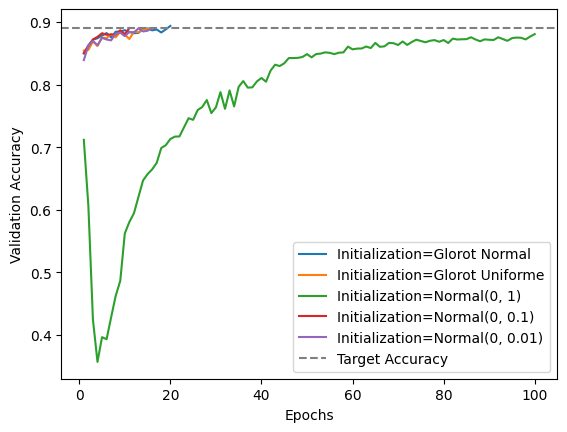

Modelo con inicializador Glorot Normal  alcanzó un accuracy de 89% en 20 epochs.
Modelo con inicializador Glorot Uniforme  alcanzó un accuracy de 89% en 16 epochs.
Modelo con inicializador Normal(0, 1) no alcanzó un accuracy de 89% en menos de 100 epochs
Modelo con inicializador Normal(0, 0.1)  alcanzó un accuracy de 89% en 11 epochs.
Modelo con inicializador Normal(0, 0.01)  alcanzó un accuracy de 89% en 16 epochs.


In [ ]:
#Grafico los resultados
for i, initialization in enumerate(initializations):
    plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], label=f"Initialization={initialization['name']}")

plt.axhline(y=0.89, color="gray", linestyle="--", label="Target Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


for i, initialization in enumerate(initializations):
    if number_of_epochs[i] < 100:
        print(f"Modelo con inicializador {initialization['name']}  alcanzó un accuracy de 89% en {number_of_epochs[i]} epochs.")
    else:
        print(f"Modelo con inicializador {initialization['name']} no alcanzó un accuracy de 89% en menos de 100 epochs")

Ambos modelos con Glorot y los que tienen el iniciador Normal con 0.1 y 0.01 dan resultados similares en la cantidad de iteraciones (así como habían dado resultados similares en el accuracy, analizado antes). El modelo con desvío estándar 0.1 converge mucho más lentamente y si bien está cerca, no alcanza el target accuracy en menos de 100 epochs 

# 3.6 Gráfico de los umbrales de decisión luego de hacerlos linealmente separables


La idea ahora es graficar los umbrales de decisión justo antes de la capa de Softmax. Se supone que las capas ocultas, a través de operaciones no lineales, permiten transformar a la image de entrada (los 784 píxeles de una imagen) en un punto en un espacio de decisiones que es linealmente separable (como debe ser para una regresión softmax).


Para esto primero se agrega una capa de tamaño dos antes de las 10 neuronas de salida que implementan la función softmax.

In [ ]:
# Loading TensorBoard for learning logging
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Define model checkpoint callback
checkpoint_path = "/content/drive/MyDrive/Redes Neuronales/TP1/mlp_ej3_model1.hdf5"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

In [ ]:
#Defino el modelo
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               200960    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_38 (Dense)            (None, 2)                 258       
                                                                 
 dense_39 (Dense)            (None, 10)              

In [ ]:
#Entreno el modelo
metrics = ["accuracy"]
optimizer = Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping, checkpoint])

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 1.7819 - accuracy: 0.2795 - val_loss: 1.5819 - val_accuracy: 0.4433
Epoch 2/50
1500/1500 [==============================] - 10s 6ms/step - loss: 1.4787 - accuracy: 0.4089 - val_loss: 1.4063 - val_accuracy: 0.3821
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 1.3239 - accuracy: 0.4502 - val_loss: 1.2590 - val_accuracy: 0.4818
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1976 - accuracy: 0.4914 - val_loss: 1.1677 - val_accuracy: 0.4863
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0569 - accuracy: 0.5369 - val_loss: 0.9145 - val_accuracy: 0.6288
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8636 - accuracy: 0.6342 - val_loss: 0.8157 - val_accuracy: 0.6520
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7948 - accuracy: 0.6628 - val_loss: 0.7460 - val_accura

In [ ]:
#Obtengo el modelo truncado cuya capa final es la de tamaño 2
truncated_model= Model(inputs=model.input, outputs=model.layers[-2].output)
truncated_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10_input (InputLaye  [(None, 28, 28)]         0         
 r)                                                              
                                                                 
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               200960    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                           

In [ ]:
#Grafico los umbrales de decisión para el set de train (referencia: https://github.com/lab-ml-itba/MLP-2019/blob/master/05-MNIST-2d-space.ipynb)
predictions = truncated_model.predict(np.vstack([x_train, x_val]), verbose=1)
maxs = np.max(predictions, axis=0)
mins = np.min(predictions, axis=0)
print(maxs, mins)

1875/1875 [==============================] - 6s 3ms/step
[723.6047  488.71158] [0. 0.]


In [ ]:
predictions_train = truncated_model.predict(x_train, verbose=1)

1500/1500 [==============================] - 4s 3ms/step


In [ ]:
# Calculo de entorno
N = 500
x1, x2 = np.meshgrid(np.linspace(mins[0], maxs[0], N), np.linspace(mins[1], maxs[1], N))
x_mesh = np.c_[x1.ravel(), x2.ravel()]
model_last_trunc = Sequential()
model_last_trunc.add(Dense(10, input_shape=(2,)))
model_last_trunc.set_weights(model.get_layer('dense_39').get_weights())
pred_mesh = model_last_trunc.predict(x_mesh, verbose=1)
Z = np.argmax(pred_mesh, axis=1).reshape(x1.shape)/10

7813/7813 [==============================] - 11s 1ms/step


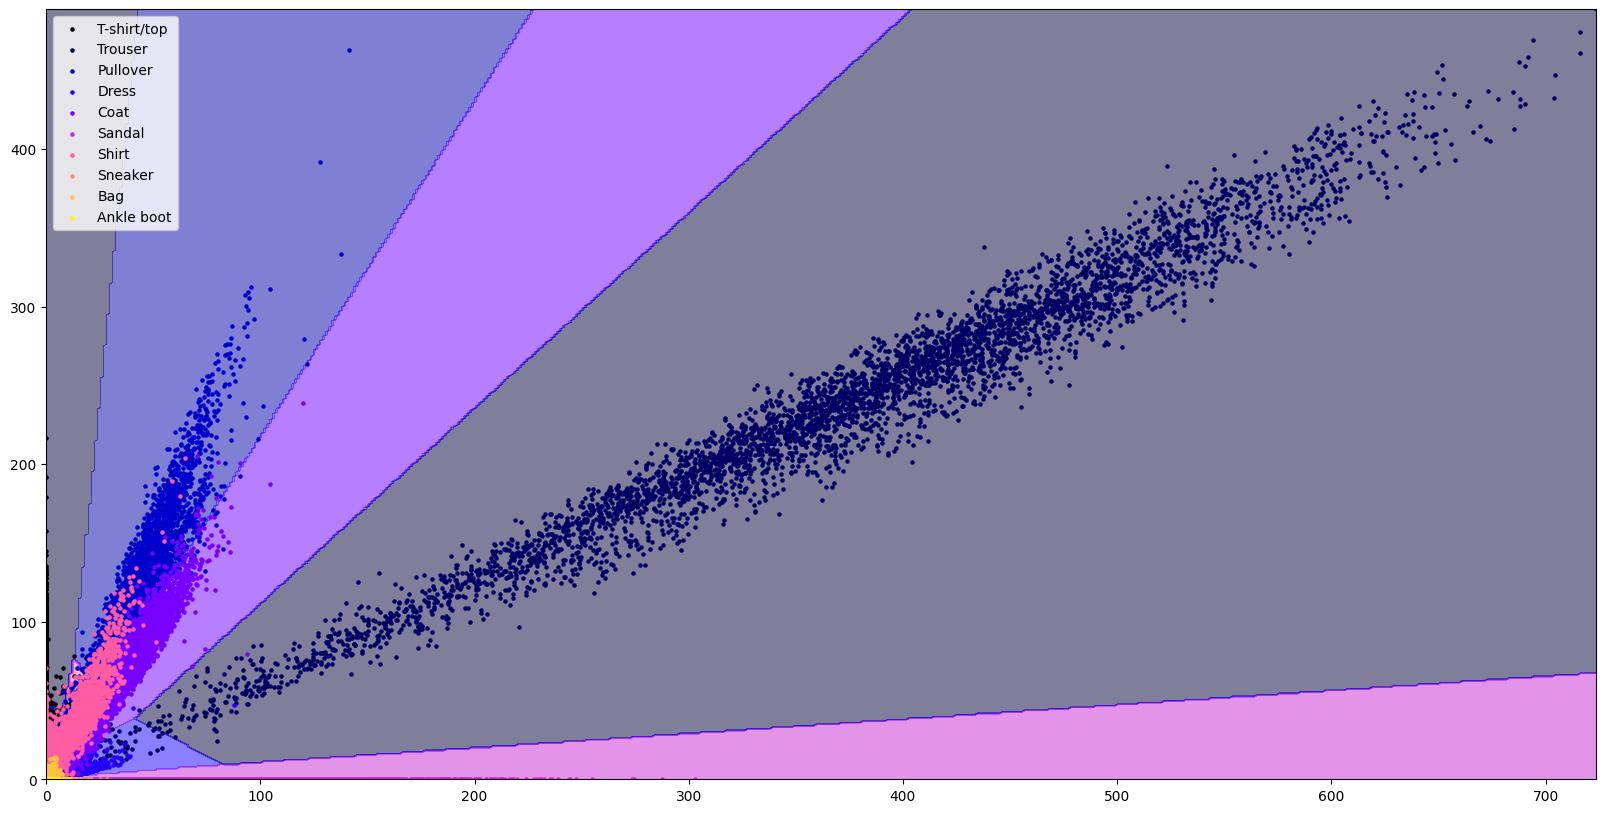

In [ ]:
plt.figure(figsize=(20,10))
plt.contourf(x1, x2, Z, 10, cmap=plt.cm.gnuplot2, alpha=0.5)
#for i, c in enumerate(['red', 'green', 'blue', 'yellow', 'black', 'orange', 'brown', 'gray', 'purple', 'cyan']):
for i in range(10):
    plt.scatter(predictions_train[y_train == i, 0], predictions_train[y_train == i, 1], c=[plt.cm.gnuplot2(i/10)], s=5, label=class_names[i])
plt.legend()
plt.show()

375/375 [==============================] - 1s 3ms/step


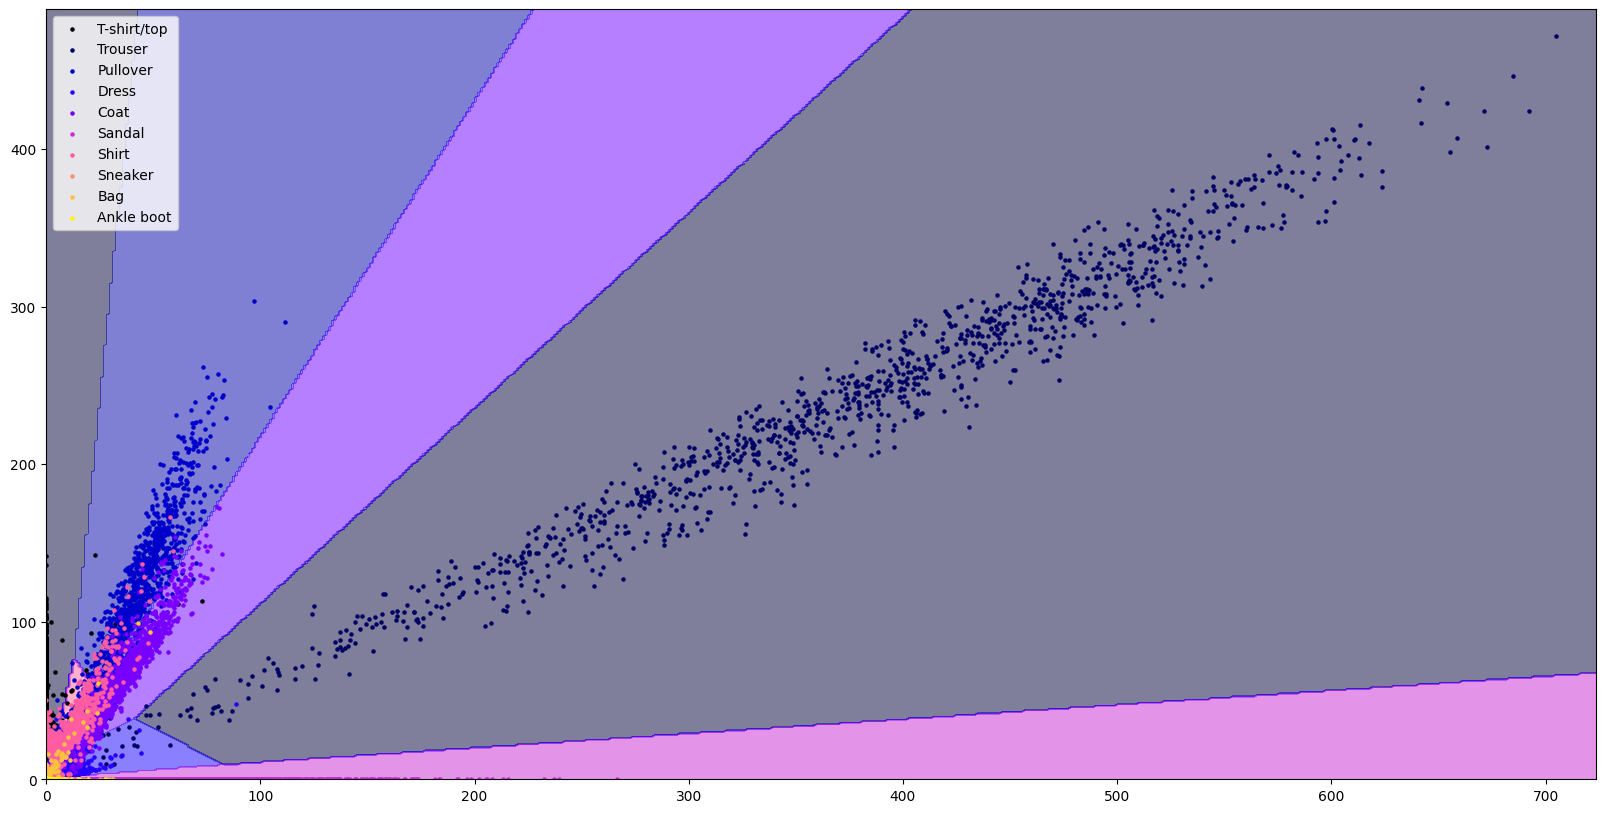

In [ ]:
#Grafico el umbral de decisión para validation
predictions_val = truncated_model.predict(x_val, verbose=1)
plt.figure(figsize=(20,10))
plt.contourf(x1, x2, Z, 10, cmap=plt.cm.gnuplot2, alpha=0.5)
#for i, c in enumerate(['red', 'green', 'blue', 'yellow', 'black', 'orange', 'brown', 'gray', 'purple', 'cyan']):
for i in range(10):
    plt.scatter(predictions_val[y_val == i, 0], predictions_val[y_val == i, 1], c=[plt.cm.gnuplot2(i/10)], s=5, label=class_names[i])
plt.legend()
plt.show()

# 3.7 Lottery Ticket Hypothesis


El objetivo ahora es poner a prueba la "lottery ticket hypothesis" (https://arxiv.org/abs/1803.03635). La idea central de la misma es que, si se inicializa con pesos aleatorias una cierta red, existe una sub-red dentro de esa red tal que la sub-red es la mayor responsable del entrenamiento y desempeño de la red total. De esta forma, si se logra identificar a esa sub-red, llamada "winning ticket", luego se podría eliminar del modelo todo lo que no forme parte de esa sub-red, y el modelo resultante se comportaría igual o incluso mejor que la red original, y tendría la ventaja de tener un tamaño menor.

In [26]:
#Creo el modelo 1
model_1 = Sequential()
model_1.add(Flatten(input_shape=[28, 28]))
model_1.add(Dense(256, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation="softmax"))
model_1.summary()
model_1.build(input_shape=(None, 28, 28))
model_1.compile()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [27]:
#Creo el model 2, que es el resultado de entrenar el modelo 1
model_2 = clone_model(model_1)
model_2.build(input_shape=model_1.input_shape)
metrics = ["accuracy"]
optimizer = Adam(learning_rate=0.001)
model_2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
model_2.set_weights(model_1.get_weights())
early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1, restore_best_weights=True)
history = model_2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5574 - accuracy: 0.7979 - val_loss: 0.4239 - val_accuracy: 0.8417
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4182 - accuracy: 0.8481 - val_loss: 0.3751 - val_accuracy: 0.8641
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3795 - accuracy: 0.8608 - val_loss: 0.3637 - val_accuracy: 0.8638
Epoch 4/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3593 - accuracy: 0.8673 - val_loss: 0.3476 - val_accuracy: 0.8693
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3418 - accuracy: 0.8737 - val_loss: 0.3432 - val_accuracy: 0.8727
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3255 - accuracy: 0.8793 - val_loss: 0.3351 - val_accuracy: 0.8773
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3162 - accuracy: 0.8831 - val_loss: 0.3290 - val_accuracy:

1500/1500 [==============================] - 4s 3ms/step - loss: 0.2063 - accuracy: 0.9216
Training Loss: 0.2063
Training Accuracy: 0.9216
375/375 [==============================] - 1s 2ms/step - loss: 0.3043 - accuracy: 0.8942
Validation Loss: 0.3043
Validation Accuracy: 0.8942


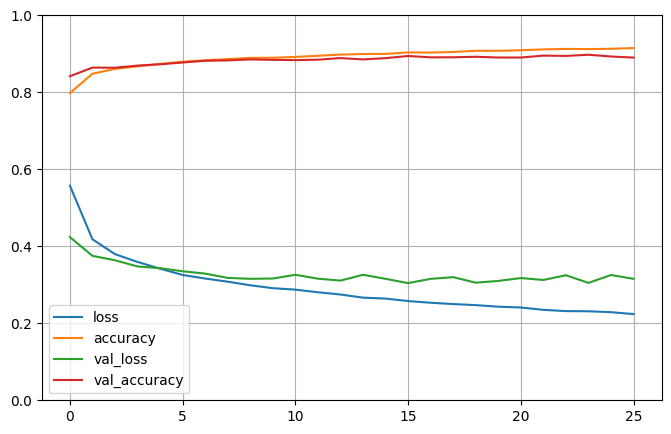

In [28]:
#Evalúo los resultados del modelo 2
results_train = model_2.evaluate(x_train, y_train)
print("Training Loss: {:.4f}".format(results_train[0]))
print("Training Accuracy: {:.4f}".format(results_train[1]))
results_val = model_2.evaluate(x_val, y_val)
print("Validation Loss: {:.4f}".format(results_val[0]))
print("Validation Accuracy: {:.4f}".format(results_val[1]))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
#Ahora me interesa comparar los pesos de los modelos 1 y 2 y crear un modelo 3 que resulte de eliminar del modelo 1 el 50% de los pesos que menos haya cambiado
weights_differences = [np.abs(weight_1 - weight_2) for weight_1, weight_2 in zip(model_1.get_weights(), model_2.get_weights())]
importance_scores = [np.sum(weight) for weight in weights_differences]
prune_indices = np.argsort(importance_scores)[:int(len(importance_scores) * 0.5)]
pruned_weights = model_1.get_weights()
for index in prune_indices:
    pruned_weights[index] = np.zeros_like(pruned_weights[index])

In [30]:
model_3 = clone_model(model_1)
model_3.build(input_shape=model_1.input_shape)
metrics = ["accuracy"]
optimizer = Adam(learning_rate=0.001)
model_3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=metrics)
model_3.set_weights(pruned_weights)

In [31]:
#Ahora miro el accuracy del modelo 3 sin entrenar
results_train = model_3.evaluate(x_train, y_train)
print("Training Loss: {:.4f}".format(results_train[0]))
print("Training Accuracy: {:.4f}".format(results_train[1]))
results_val = model_3.evaluate(x_val, y_val)
print("Validation Loss: {:.4f}".format(results_val[0]))
print("Validation Accuracy: {:.4f}".format(results_val[1]))

1500/1500 [==============================] - 4s 3ms/step - loss: 2.5216 - accuracy: 0.1298
Training Loss: 2.5216
Training Accuracy: 0.1298
375/375 [==============================] - 1s 2ms/step - loss: 2.5249 - accuracy: 0.1279
Validation Loss: 2.5249
Validation Accuracy: 0.1279


In [32]:
#Ahora entreno el modelo 3, que tiene la mitad de tamaño que modelo 1 y modelo 2
early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1, restore_best_weights=True)
history = model_3.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5605 - accuracy: 0.7992 - val_loss: 0.4140 - val_accuracy: 0.8468
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4213 - accuracy: 0.8483 - val_loss: 0.3876 - val_accuracy: 0.8596
Epoch 3/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3820 - accuracy: 0.8609 - val_loss: 0.3930 - val_accuracy: 0.8577
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3593 - accuracy: 0.8673 - val_loss: 0.3318 - val_accuracy: 0.8803
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3426 - accuracy: 0.8736 - val_loss: 0.3420 - val_accuracy: 0.8744
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3308 - accuracy: 0.8771 - val_loss: 0.3254 - val_accuracy: 0.8805
Epoch 7/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3180 - accuracy: 0.8836 - val_loss: 0.3266 - val_accurac

1500/1500 [==============================] - 5s 3ms/step - loss: 0.1778 - accuracy: 0.9301
Training Loss: 0.1778
Training Accuracy: 0.9301
375/375 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8929
Validation Loss: 0.3038
Validation Accuracy: 0.8929


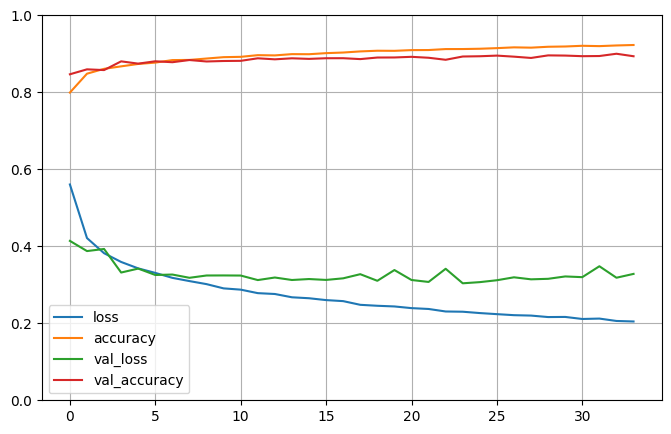

In [33]:
#Evalúo los resultados del modelo 3 luego de entrenar
results_train = model_3.evaluate(x_train, y_train)
print("Training Loss: {:.4f}".format(results_train[0]))
print("Training Accuracy: {:.4f}".format(results_train[1]))
results_val = model_3.evaluate(x_val, y_val)
print("Validation Loss: {:.4f}".format(results_val[0]))
print("Validation Accuracy: {:.4f}".format(results_val[1]))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Increíblemente, se observa que el modelo 3, que tiene la mitad del tamaño del modelo 2, logra un rendimiento prácticamente igual al del modelo 2. Se observa entonces que la subred que comprende al modelo 3 es un "winning ticket", según lo que postula la "lottery ticket hypothesis".